In [1]:
import numpy as np
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import plotly.graph_objects as go
import math
import random
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler

iris = datasets.load_iris()
df = pd.DataFrame(iris.data ,columns = iris.feature_names)
df['label'] = iris.target
X = df[['sepal length (cm)','sepal width (cm)',
        'petal length (cm)','petal width (cm)']]
scaler = MinMaxScaler()
dataset = scaler.fit_transform(X)

In [2]:
def caculate_net(data_point,w,size):
  nets = np.zeros([size,size])
  for i in range(size):
    for j in range(size):
      for f in range(4):
        net = ( dataset[data_point][f] - w[f][i][j] )**2
        nets[i][j] += net
  return nets

def winner_node(nets,size):
  i_star,j_star = np.argmin(nets)//size,np.argmin(nets)%size
  return i_star,j_star
  
def neighborhood(i_star,j_star,R,size):
  r = np.zeros([size,size])
  neighborhood = np.zeros([size,size])
  for i in range(size):
    for j in range(size):
      r[i][j] = np.sqrt( (i-i_star)**2 + (j-j_star)**2 )
      neighborhood[i][j] = np.exp( -r[i][j] /R)
  return neighborhood

def updata_w(data_point,neighborhood,eta,size):
  delta_w = np.zeros([4,size,size])
  for f in range(4):
    for i in range(size):
      for j in range(size):
        delta_w[f][i][j]=eta*(dataset[data_point][f]-w[f][i][j])*neighborhood[i][j]
  return delta_w

def Total_distance(data_point,w,i_star,j_star):
  distance = 0
  for i in range(4):
    distance += (dataset[data_point][i] - w[i][i_star][j_star]) **2
  distance = np.sqrt(distance)
  return distance

def SOM(iteration,size,R,eta,R_rate,eta_rate):
  global w
  w = np.random.rand(4, size , size )
  total_distance_set = []
  for iter in range(iteration):
    output_layer = np.zeros([size,size])
    distance = 0
    for data in range(len(dataset)):

      nets = caculate_net(data,w,size)
      i_star , j_star = winner_node(nets,size)
      output_layer[i_star,j_star] += 1
      neibor = neighborhood(i_star,j_star,R,size)
      delta_w = updata_w(data,neibor,eta,size)
      distance += Total_distance(data,w,i_star,j_star)
      w = w + delta_w

    total_distance_set.append(distance)
    eta = eta * eta_rate
    R = R * R_rate
  return output_layer,total_distance_set

def plot_convergence(total_distance_set,iteration):
  plt.figure(figsize=(5,3),dpi=100,linewidth = 2)
  plt.plot(range(iteration),
       total_distance_set,color='g',label="error")
  plt.title("SOM convergence history",
        fontsize=10, x=0.5, y=1.03)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.xlabel("training iteration",fontsize=10,labelpad=5)
  plt.ylabel("error", fontsize=10, labelpad = 5)
  plt.legend(loc = "best", fontsize=8)
  plt.show()

def plot_topology(output_layer,size):
  num = 0
  xdata,ydata = [],[]
  for i in range(size):
    xxdata = []
    yydata = []
    for j in range(size):
      xxdata.append(j)
      yydata.append(num)
    num += 1
    xdata.append(xxdata)
    ydata.append(yydata)
  X = xdata
  Y = ydata
  Z = output_layer
  # Plotly 3D Surface
  fig = go.Figure(go.Surface(x=X,y=Y,z=Z,colorscale='Viridis'))
  # fig = go.Figure(go.Surface(x=X,y=Y,z=Z))
  fig.update_layout(scene = {
                "xaxis": {"nticks": 10},
                "yaxis": {"nticks": 10},
                "zaxis": {"nticks": 30},
                'camera_eye': {"x": 0, "y": -1, "z": 0.5},
                "aspectratio": {"x": 1, "y": 1, "z": 1} } )
  fig.update_layout(title= f'{size}x{size} output layer', autosize=True, width=700, height=700)
  fig.show()

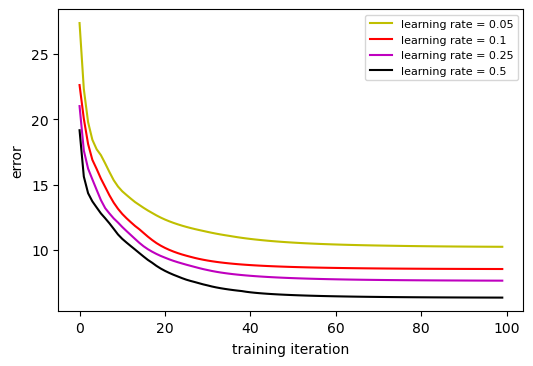

10.24457802819252
8.542610598109894
7.650334853026113
6.3526443672085895


In [5]:
iteration = 100
outputlr3 ,total_distance_lr_3 = SOM(iteration=100,size=10,R=1,eta=0.05,R_rate=0.95,eta_rate=0.95)
outputlr4 ,total_distance_lr_4 = SOM(iteration=100,size=10,R=1,eta=0.1,R_rate=0.95,eta_rate=0.95)
outputlr5 ,total_distance_lr_5 = SOM(iteration=100,size=10,R=1,eta=0.25,R_rate=0.95,eta_rate=0.95)
outputlr6 ,total_distance_lr_6 = SOM(iteration=100,size=10,R=1,eta=0.5,R_rate=0.95,eta_rate=0.95)

plt.figure(figsize=(6,4),dpi=100,linewidth = 2)
plt.plot(range(iteration),total_distance_lr_3,color = 'y', label="learning rate = 0.05")
plt.plot(range(iteration),total_distance_lr_4,color = 'r', label="learning rate = 0.1")
plt.plot(range(iteration),total_distance_lr_5,color = 'm', label="learning rate = 0.25")
plt.plot(range(iteration),total_distance_lr_6,color = 'k', label="learning rate = 0.5")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("training iteration", fontsize=10, labelpad = 5)
plt.ylabel("error", fontsize=10, labelpad = 5)
plt.legend(loc = "best", fontsize = 8 )
plt.show()
print(total_distance_lr_3[-1])
print(total_distance_lr_4[-1])
print(total_distance_lr_5[-1])
print(total_distance_lr_6[-1])

In [6]:
plot_topology(outputlr3,size = 10)
plot_topology(outputlr4,size = 10)
plot_topology(outputlr5,size = 10)
plot_topology(outputlr6,size = 10)

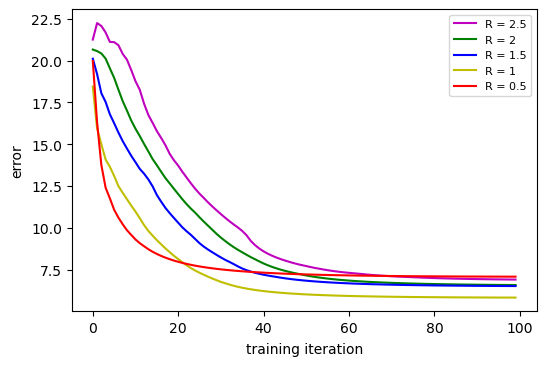

6.92683678153046
6.600222956571961
6.540092812424961
5.850267550725898
7.1002737970991845


In [7]:
iteration = 100
outputR5 ,total_distance_R_5 = SOM(iteration=100,size=10,R=2.5,eta=0.5,R_rate=0.95,eta_rate=0.95)
outputR1 ,total_distance_R_1 = SOM(iteration=100,size=10,R=2,eta=0.5,R_rate=0.95,eta_rate=0.95)
outputR2 ,total_distance_R_2 = SOM(iteration=100,size=10,R=1.5,eta=0.5,R_rate=0.95,eta_rate=0.95)
outputR3 ,total_distance_R_3 = SOM(iteration=100,size=10,R=1,eta=0.5,R_rate=0.95,eta_rate=0.95)
outputR4 ,total_distance_R_4 = SOM(iteration=100,size=10,R=0.5,eta=0.5,R_rate=0.95,eta_rate=0.95)

plt.figure(figsize=(6,4),dpi=100,linewidth = 2)
plt.plot(range(iteration),total_distance_R_5,color = 'm', label="R = 2.5")
plt.plot(range(iteration),total_distance_R_1,color = 'g', label="R = 2")
plt.plot(range(iteration),total_distance_R_2,color = 'b', label="R = 1.5")
plt.plot(range(iteration),total_distance_R_3,color = 'y', label="R = 1")
plt.plot(range(iteration),total_distance_R_4,color = 'r', label="R = 0.5")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("training iteration", fontsize=10, labelpad = 5)
plt.ylabel("error", fontsize=10, labelpad = 5)
plt.legend(loc = "best", fontsize=8)
plt.show()
print(total_distance_R_5[-1])
print(total_distance_R_1[-1])
print(total_distance_R_2[-1])
print(total_distance_R_3[-1])
print(total_distance_R_4[-1])

In [8]:
plot_topology(outputR5,size=10)
plot_topology(outputR1,size=10)
plot_topology(outputR2,size=10)
plot_topology(outputR3,size=10)
plot_topology(outputR4,size=10)

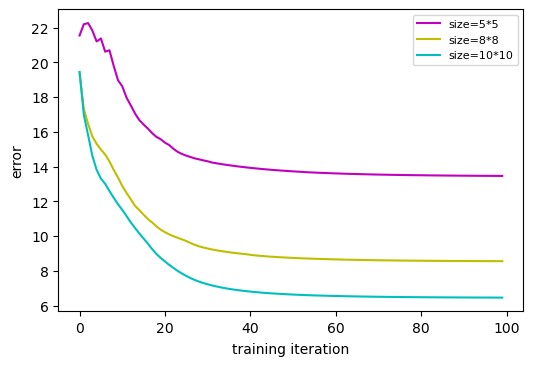

13.46995701216304
8.564601041377767
6.469063872461976


In [9]:
iteration = 100
output_topo5 ,total_distance_size5 = SOM(iteration=100,size=5,R=1,eta=0.5,R_rate=0.95,eta_rate=0.95)
output_topo8 ,total_distance_size8 = SOM(iteration=100,size=8,R=1,eta=0.5,R_rate=0.95,eta_rate=0.95)
output_topo10 ,total_distance_size10 = SOM(iteration=100,size=10,R=1,eta=0.5,R_rate=0.95,eta_rate=0.95)

plt.figure(figsize=(6,4),dpi=100,linewidth = 2)
plt.plot(range(iteration),total_distance_size5,color = 'm', label="size=5*5")
plt.plot(range(iteration),total_distance_size8,color = 'y', label="size=8*8")
plt.plot(range(iteration),total_distance_size10,color = 'c', label="size=10*10")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("training iteration", fontsize=10, labelpad = 5)
plt.ylabel("error", fontsize=10, labelpad = 5)
plt.legend(loc = "best", fontsize=8)
plt.show()
print(total_distance_size5[-1])
print(total_distance_size8[-1])
print(total_distance_size10[-1])

In [10]:
plot_topology(output_topo5,size=5)
plot_topology(output_topo5,size=8)
plot_topology(output_topo10,size=10)

# MiniSOM

In [3]:
!pip install minisom

  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=2ab0e90af6bbed496eacd6090078b164e0600a7d8d5677d44799f1e02952c220
  Stored in directory: c:\users\assd4\appdata\local\pip\cache\wheels\7e\47\6d\97ad48be13d8b0fc231b7df226a3d6645820c32559822a826c
Successfully built minisom


In [11]:
from minisom import MiniSom
for i in [5,8,10]: # 'gaussian', 'mexican_hat', 'bubble', 'triangle'
  som = MiniSom(x = i, y = i, input_len=4, sigma=1 ,learning_rate=0.5,neighborhood_function='mexican_hat')
  som.train(dataset,100)
  frequencies=np.zeros((i,i))
  for position,values in som.win_map(dataset).items():
    frequencies[position[0],position[1]]=len(values)
  print(frequencies)
  plot_topology(frequencies,size = i)

[[142.   0.   0.   0.   0.]
 [  0.   0.   0.   1.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   1.   3.]
 [  3.   0.   0.   0.   0.]]


[[  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.  50.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 100.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]]


[[ 0.  0.  0.  0.  0.  0.  0.  0. 72.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  4.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [24.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 50.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


## Compare clustering result

### MiniSOM

In [ ]:
pip install MiniSom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data ,columns = iris.feature_names)
df['label'] = iris.target
X = df[['sepal length (cm)','sepal width (cm)',
        'petal length (cm)','petal width (cm)']]
# data normalization
scaler = MinMaxScaler()
cluster_dataset = scaler.fit_transform(X)
cluster_dataset_df = pd.DataFrame(cluster_dataset,columns = X.columns )

 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 0.2932174465345227


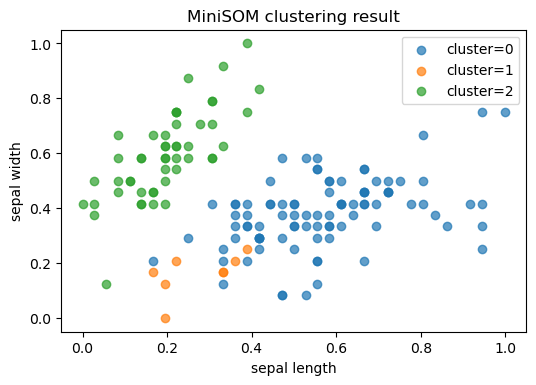

In [17]:
# Initialization and training
som_shape = (1,3)
# 'gaussian', 'mexican_hat', 'bubble', 'triangle'

som = MiniSom(som_shape[0],som_shape[1], input_len=4 , sigma=1,learning_rate=0.5,neighborhood_function= 'gaussian')
som.train(cluster_dataset, 100, verbose=True)

# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in cluster_dataset]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape )

import matplotlib.pyplot as plt
%matplotlib inline
# plotting the clusters using the first 2 dimentions of the data

plt.figure(figsize=(6,4),dpi=100)
for c in np.unique(cluster_index):
  plt.scatter(cluster_dataset[cluster_index == c, 0],
             #cluster_dataset[cluster_index == c, 1], alpha=.7)
             cluster_dataset[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)
plt.legend();
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('MiniSOM clustering result');

### k-means

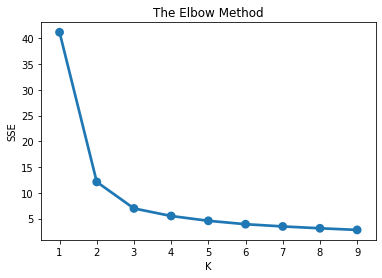

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt

#fit KMeans and calculate SSE for each K
sse = {}
for k in range(1,10):
	kmeans = KMeans(n_clusters=k,max_iter = 300, n_init = 10, random_state = 42)
	kmeans.fit(cluster_dataset_df)
	sse[k] = kmeans.inertia_

#plot SSE for each K
plt.title('The Elbow Method')
plt.xlabel('K')
plt.ylabel('SSE')
sns.pointplot( x=list(sse.keys()), y=list(sse.values()) )
plt.show()

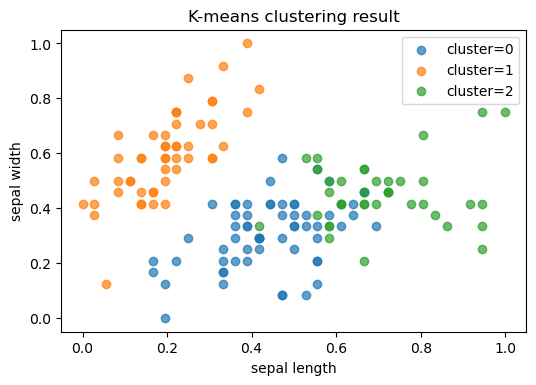

In [16]:
model = KMeans(n_clusters=3, random_state=1,max_iter = 200)
model.fit(cluster_dataset)
cluster_index = model.labels_
plt.figure(figsize=(6,4),dpi=100)
for c in np.unique(cluster_index):
  plt.scatter( cluster_dataset[cluster_index == c, 0],cluster_dataset[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('K-means clustering result');
plt.legend();

## comparision

In [22]:
som_cluster_index = np.ravel_multi_index(winner_coordinates, som_shape )
kmeans_cluster_index = model.labels_
print(som_cluster_index)
print(kmeans_cluster_index)
print(np.array( df['label'] ))

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 2 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [23]:
for i in range(len(som_cluster_index)):
  if som_cluster_index[i] == 2 :
    som_cluster_index[i] = 0
  elif som_cluster_index[i] == 0:
    som_cluster_index[i] = 2
  else:
    som_cluster_index[i] = 1

for i in range(len(kmeans_cluster_index)):
  if kmeans_cluster_index[i] == 1 :
    kmeans_cluster_index[i] = 0
  elif kmeans_cluster_index[i] == 0 :
    kmeans_cluster_index[i] = 1
  else :
    kmeans_cluster_index[i] = 2

In [25]:
from sklearn.metrics import classification_report
print('k-means result')
print(classification_report( np.array( df['label'] ), kmeans_cluster_index ))
print('MiniSOM result')
print(classification_report( np.array( df['label'] ), som_cluster_index) )

k-means result
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.77      0.94      0.85        50
           2       0.92      0.72      0.81        50

    accuracy                           0.89       150
   macro avg       0.90      0.89      0.89       150
weighted avg       0.90      0.89      0.89       150

MiniSOM result
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.16      0.28        50
           2       0.54      1.00      0.70        50

    accuracy                           0.72       150
   macro avg       0.85      0.72      0.66       150
weighted avg       0.85      0.72      0.66       150

